<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 04: Support Vector Machines (SVMs) and Kernel Methods**

In this notebook, we will cover:

- Understanding the fundamentals of SVMs and their mathematical intuition.  
- Understanding the concept of the hyperplane and margins.  
- Differentiating between hard margin and soft margin SVMs.  
- Learning about kernel methods and the kernel trick.  
- Exploring hyperparameter tuning (`C`, `gamma`) to improve SVM performance.  
- Implementing SVMs hands-on in Python using Scikit-Learn and UCI data.  
- Applying cross-validation and standardization in machine learning.


# **Conceptual Understanding of SVM**  
## **What is SVM?**
Support Vector Machines (SVM) are supervised learning algorithms used for both classification and regression tasks. However, they are most commonly used for classification problems.

**Key Idea**
- The main goal of SVM is to find the best decision boundary (called a **hyperplane**) that separates different classes of data.
- Instead of just drawing any line that separates the data, SVM chooses the one that maximizes the **margin**—the space between the closest points of each class.
- These closest points are called **support vectors**, and they are the most important data points because they define the boundary.

**Why is Margin Size Important?**

- A larger margin usually leads to better generalization, meaning the model performs well on unseen data.
- A smaller margin means the decision boundary is too close to data points, which can cause overfitting (performing well on training data but poorly on new data).



## **Hyperplane & Margins**
A hyperplane is the decision boundary that separates different classes.

- In 2D space → the hyperplane is a straight line.
- In 3D space → the hyperplane is a flat plane.
- In higher dimensions (n-dimensional space) → the hyperplane is an (n-1)-dimensional surface.

A hyperplane divides the space into two parts while being itself one dimension lower than the space it exists in. That’s why in n-dimensional space, a hyperplane is always (n-1) dimensional. For example, in 3D space, a plane (2D) can split space into two halves. In 4D space, a 3D hyperplane would do the same.



**Example:**

If we are classifying emails as spam or not spam based on two features (e.g., number of links and email length), the decision boundary will be a line (2D).
If we add a third feature (e.g., number of capitalized words), the decision boundary will be a plane (3D).

For more than three features, we can no longer visualize it, but mathematically, it’s still a hyperplane.



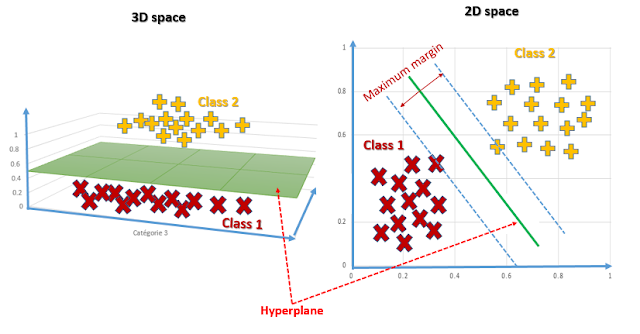

Ref: https://www.reachiteasily.com/2021/07/support-vector-machine-svm-machine.html?m=0

### **Mathematical Formulation**
The equation of a hyperplane is:

$$ w \cdot x + b = 0 $$

where:
- $ w $ is the weight vector (controls the direction of the hyperplane).
- $ x $ is the feature vector.
- $ b $ is the bias term (controls the offset from the origin).

Intuition:
- If 𝑏 = 0, the hyperplane passes through the origin.
- If 𝑏 > 0, the hyperplane shifts away from the origin in one direction.
- If 𝑏 < 0, the hyperplane shifts in the opposite direction.

The origin is the point where all coordinates are zero in a given space. It serves as the reference point for the coordinate system.

The margin width (the distance between the hyperplane and the nearest support vectors) is given by:

$$ \frac{2}{||w||} $$

$w$ (weight vector): This represents the coefficients of the decision boundary (or hyperplane). It determines the orientation of the hyperplane in space.

$\|w\|$ (norm of $w$): This is the magnitude (length) of the weight vector, computed as:

$$\|w\| = \sqrt{w_1^2 + w_2^2 + \dots + w_n^2}$$

It measures the strength or scale of the weight vector.

$\frac{2}{\|w\|}$: This term often appears in margin calculations in Support Vector Machines (SVMs). It represents the width of the margin (the distance between the support vectors on either side of the hyperplane).



**Goal of SVM:**

- Maximize the margin (to improve generalization).
- Ensure correct classification of data points with the best possible separation.

**Intuition Behind SVM**

Think of SVM as drawing a fence between two groups of people (classes). The best fence is the one that stays as far away as possible from both groups.

- If the fence is too close to one side, it might misclassify some people.
- If it's too wide, it might not fit within the available space.

SVM finds the perfect balance where the fence is positioned in a way that maximizes the space between the closest individuals from both sides.






## **Hard Margin vs. Soft Margin SVM**

SVMs aim to find the best possible decision boundary that separates different classes. However, real-world data is rarely perfectly separable, which is why we need to understand hard margin and soft margin approaches.

### **Hard Margin SVM**

- Assumes that the data is perfectly separable.
- Does not allow any misclassification—every data point must be on the correct side of the margin.
- The model finds the maximum margin while ensuring all points are correctly classified.

**Mathematical Constraint:**

For each data point (𝑥𝑖,𝑦𝑖):

Mathematical constraint:

$$ y_i (w \cdot x_i + b) \geq 1, \forall i $$

where:

- 𝑥𝑖 = Feature vector (input data point).
- 𝑦𝑖 = The actual class label of data point 𝑖 (either +1 or -1).
- 𝑤 = Weight vector.
- 𝑏 = Bias term.
- 𝑤⋅𝑥𝑖+𝑏 → The predicted value from the SVM model.
- The condition 𝑦𝑖(𝑤⋅𝑥𝑖+𝑏)≥1 ensures that all data points are correctly classified with a margin of at least 1.
- The ∀𝑖 (for all i) notation emphasizes that this rule applies to every single data point in the training set, not just one or a few.

**Limitation of Hard Margin SVM:**

- Fails if data is not perfectly separable: In real-world data, classes often overlap or have noise (outliers).
- Very sensitive to outliers: One incorrectly placed data point can drastically change the decision boundary.

**Example:**

Imagine you are classifying emails as spam vs. not spam, but there is one incorrectly labeled email. A hard-margin SVM would fail because it does not tolerate any mistakes.




### **Soft Margin SVM**
- Allows **some misclassification** by introducing **slack variables** $ \xi_i $ (Greek letter xi) to handle overlapping or noisy data.
- Balances margin size and classification accuracy using a regularization parameter $ C $ :

$$ \min \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i $$

where:
- $||w||^2$ ensures we maximize the margin.
- $ \xi_i $ represents the total misclassification allowed.
- $C$ (regularization parameter) controls the trade-off between margin width and classification accuracy.

Effect of 𝐶 (Regularization Parameter):
- **Large $ C $**: Less misclassification (strict), but may lead to overfitting.
- **Small $ C $**: Allows more misclassification (flexible), leading to better generalization.

**Example:**

Returning to the spam classification problem:

- A hard-margin SVM would require a perfect separation of spam and non-spam emails.
- A soft-margin SVM allows some emails to be misclassified, recognizing that no real-world model is perfect.

### Summary

\
\begin{array}{|c|c|c|}
\hline
\textbf{Feature} & \textbf{Hard Margin SVM} & \textbf{Soft Margin SVM} \\
\hline
\textbf{Misclassification} & \text{ ❌ Not allowed} & \text{ ✅ Allowed (controlled by } C \text{)} \\
\hline
\textbf{Use case} & \text{Perfectly separable data} & \text{Real-world noisy/overlapping data} \\
\hline
\textbf{Overfitting risk} & \text{High (sensitive to noise)} & \text{Lower (better generalization)} \\
\hline
\textbf{Mathematical Constraint} & y_i (w \cdot x_i + b) \geq 1, \quad \forall i & \text{Uses slack variables } \xi_i \\
\hline
\end{array}



**Description of Data and Method**

In this example, we generate a synthetic dataset using make_blobs from sklearn.datasets. The dataset consists of 100 data points with two features (x, y coordinates), grouped into two distinct classes for binary classification. The data is intentionally created with some overlapping regions by setting cluster_std=2.0 to demonstrate the impact of Hard Margin vs. Soft Margin SVMs.

**We train two Support Vector Machine (SVM) models:**

- Hard Margin SVM (C=1e6): A strict model that does not allow misclassification, forcing a rigid separation.
- Soft Margin SVM (C=0.01): A more flexible model that allows some misclassified points, improving generalization.

The decision boundaries of both models are visualized using a contour plot, highlighting support vectors (critical points defining the margin) and misclassified points (points inside the margin or wrongly classified). This comparison helps illustrate how different values of C affect the SVM's decision boundary and classification performance.

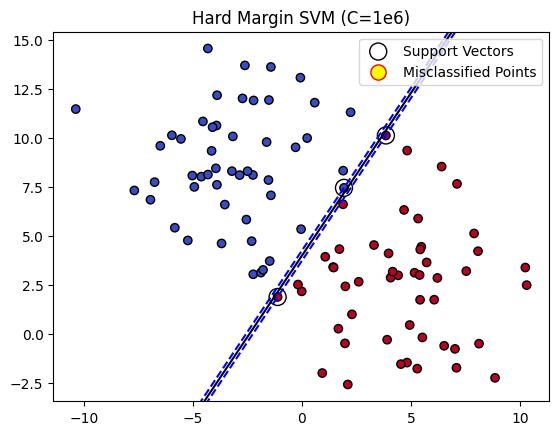

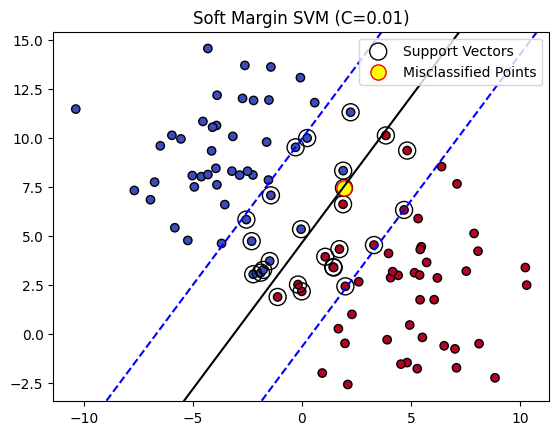

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate dataset with overlap for Soft Margin misclassification
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=3.0)  # Adjust for better soft margin effect

# Train two SVM models: Hard Margin (C=1e6) and Soft Margin (C=0.01)
hard_margin_svm = SVC(kernel='linear', C=1e6)  # Hard Margin (strict separation)
soft_margin_svm = SVC(kernel='linear', C=0.01)  # Soft Margin (allows misclassifications)

# Train the models
hard_margin_svm.fit(X, y)
soft_margin_svm.fit(X, y)

# Function to plot decision boundary
def plot_svm_boundary(model, X, y, title, show_misclassified=True):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Get axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Compute decision function
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'blue'], linestyles=['--', '-', '--'])

    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=150, facecolors='none', edgecolors='black', label="Support Vectors")

    # Predict labels and find misclassified points
    y_pred = model.predict(X)
    misclassified = X[y != y_pred]

    # Show misclassified points only if allowed
    if show_misclassified and len(misclassified) > 0:
        plt.scatter(misclassified[:, 0], misclassified[:, 1], s=120, facecolors='yellow',
                    edgecolors='red', label="Misclassified Points")
    else:
        # Add invisible point to keep the legend
        plt.scatter([], [], s=120, facecolors='yellow', edgecolors='red', label="Misclassified Points")

    # Always include the legend
    plt.title(title)
    plt.legend()
    plt.show()

# Plot Hard Margin SVM (Legend included, but no misclassified points)
plot_svm_boundary(hard_margin_svm, X, y, "Hard Margin SVM (C=1e6)", show_misclassified=False)

# Plot Soft Margin SVM (Shows actual misclassified points)
plot_svm_boundary(soft_margin_svm, X, y, "Soft Margin SVM (C=0.01)", show_misclassified=True)


Soft Margin SVM (C=0.01)

✔ The decision boundary is more flexible, allowing a wider margin.

✔ More support vectors inside the margin, making the model more adaptable.

✔ Some misclassified points (highlighted in yellow) are allowed to improve flexibility.

✔ Better generalization for real-world data with overlapping classes, but at the cost of slightly lower precision.

Hard Margin SVM (C=1e6)

✔ The decision boundary is strict, with a narrow margin.

✔ No points are allowed inside the margin except support vectors on the edge.

✔ Only a few support vectors influence the boundary, making it highly sensitive.

✔ Misclassified points are minimal, but the model is highly sensitive to noise and may overfit if the data is not perfectly separable.

# Kernel Methods: Extending SVM to Non-Linear Data

A kernel function is a mathematical function that computes the relationship between data points in a transformed (higher-dimensional) space without explicitly performing the transformation.

## Why Do We Need Kernels?  
SVMs work well when data is **linearly separable**, meaning a straight line (or a hyperplane in higher dimensions) can separate the classes. However, in many real-world cases, data is **non-linearly separable**, meaning no straight line can effectively classify it.

For example, consider a classification problem where:
- Class A points are inside a circle.
- Class B points are outside the circle.

A straight line cannot separate these two classes in a 2D space. However, if we transform the data into a higher-dimensional space, it may become linearly separable.

Solution → **The Kernel Trick**

Instead of manually transforming the data, we use a **kernel function** that mathematically maps it into a higher-dimensional space implicitly, without actually computing the transformation.


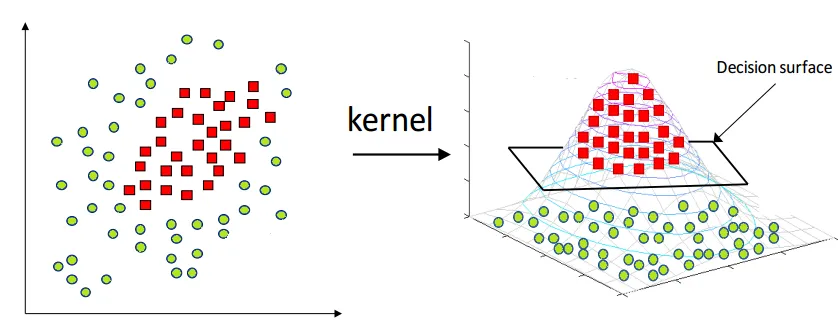

Ref: https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d

## Understanding the Kernel Trick  

A kernel function measures the **similarity** between two data points in a transformed feature space. It is defined as:

$$ K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j) $$

where:
- **$ \phi(x) $** is the transformation function that maps data into a higher-dimensional space.
- **$ K(x_i, x_j) $** computes the dot product of the transformed feature vectors without explicitly computing $ \phi(x) $.

Instead of computing **$ \phi(x) $** directly, the **Kernel Trick** allows us to apply the kernel function **$ K(x_i, x_j) $** to work in the higher-dimensional space efficiently, without the need for costly computations.

This allows SVM to find decision boundaries for **non-linearly separable data** while maintaining computational efficiency.


### The Dot Product

The **dot product** (also called the inner product or scalar product) is a fundamental operation in linear algebra that measures the similarity between two vectors.

### Definition
The dot product of two vectors **$A$** and **$B$** is given by:

$$ A \cdot B = A_1 B_1 + A_2 B_2 + A_3 B_3 + \dots + A_n B_n $$

where:

- $A = (A_1, A_2, ..., A_n)$ and $B = (B_1, B_2, ..., B_n)$ are n-dimensional vectors.
- The result of the dot product is a single number (scalar).

Alternatively, the dot product can be written using the angle between the vectors:

$$ A \cdot B = ||A|| \cdot ||B|| \cos\theta $$

where:

- $||A||$ and $||B||$ are the magnitudes (lengths) of vectors $A$ and $B$.
- $\theta$ is the angle between the two vectors.


### Geometric Interpretation

- If **$A \cdot B > 0$** → The two vectors are pointing **in a similar direction** (small angle between them).
- If **$A \cdot B < 0$** → The two vectors are pointing **in opposite directions**.
- If **$A \cdot B = 0$** → The vectors are perpendicular (90° angle), meaning they are **orthogonal**.


## Common Kernel Functions and Their Applications  

Different kernels capture different relationships in data. The most commonly used kernels are:

| **Kernel Type**  | **Equation** | **Best Use Case** |
|------------------|-------------|-------------------|
| **Linear Kernel** | $$ K(x, y) = x \cdot y $$ | When data is already linearly separable. |
| **Polynomial Kernel** | $$ K(x, y) = (x \cdot y + c)^d $$ | When decision boundaries follow a polynomial pattern. |
| **Radial Basis Function (RBF) Kernel** | $$ K(x, y) = e^{-\gamma ||x - y||^2} $$ | When the decision boundary is highly complex and non-linear. |
| **Sigmoid Kernel** | $$ K(x, y) = \tanh(\alpha x \cdot y + c) $$ | When modeling relationships similar to a neural network. |



## How Kernels Work Visually  
Consider a dataset where we classify yellow and dark blue points:

- **Linear Kernel** tries to separate data using a straight line.
- **Polynomial Kernel** uses curved decision boundaries to separate the data.
- **RBF Kernel** creates a flexible, wavy boundary that adapts to complex patterns.
- **Sigmoid Kernel** produces multiple, angular decision boundaries, resembling activation functions in neural networks.



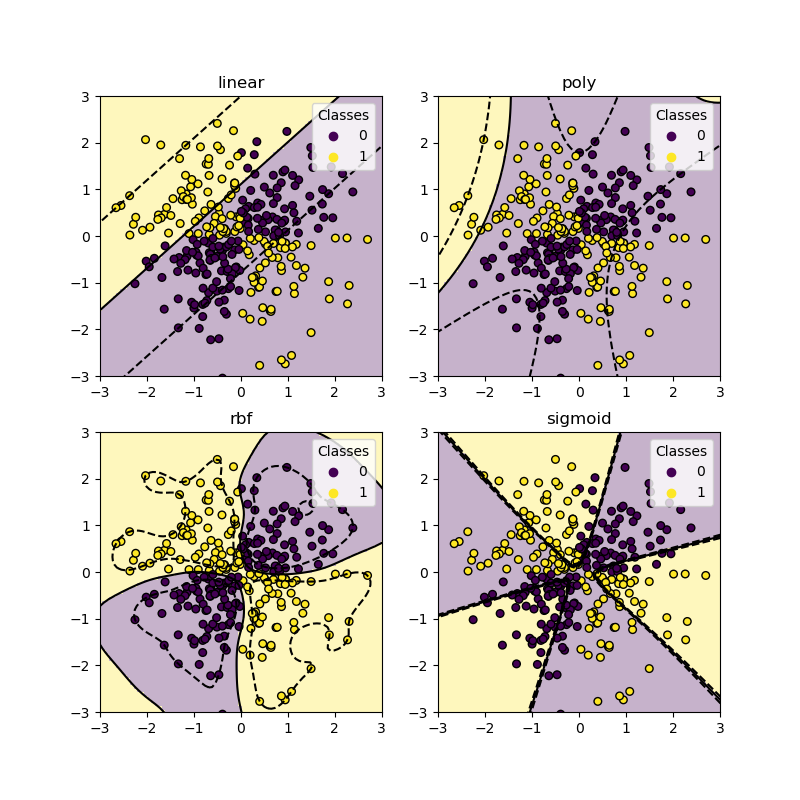

Ref: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html

## Real-World Examples of SVM Kernels  

### Linear Kernel → Text Classification, Spam Detection  

The Linear Kernel is widely used in Natural Language Processing (NLP) tasks where data is high-dimensional and a linear decision boundary works well.

Use Cases:  

- **Spam detection**: Classifying emails as spam or not spam based on word frequency.  
- **Sentiment analysis**: Identifying if a review is positive or negative.  

Since text data is often represented as a large feature space (each word is a feature), a linear SVM performs efficiently without requiring complex transformations.


### Polynomial Kernel → DNA Sequence Classification  

The Polynomial Kernel is useful when relationships between features are non-linear but follow structured patterns.

Use Cases:

- **DNA and RNA classification**: Identifying genetic sequences linked to diseases.  
- **Protein classification**: Recognizing protein molecular structures for medical research.  

Since biological sequences often have complex, yet structured relationships, a polynomial decision boundary helps capture these patterns.



### RBF Kernel → Image Recognition (Handwritten Digits, Face Recognition)  

The RBF Kernel is widely used in image classification because images are complex and not linearly separable.

Use Cases:

- **Handwritten digit recognition (MNIST dataset)**:  
  - The RBF Kernel maps pixel intensity patterns into a higher-dimensional space.  
  - Digits like 3 and 8, which are visually similar, become easier to separate.  
- **Face recognition in security systems**:  
  - Helps in detecting and distinguishing facial features.  
  - Since faces contain curved and non-linear patterns, RBF performs better than a linear classifier.


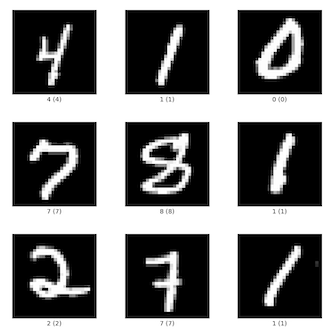

Ref: https://www.tensorflow.org/datasets/catalog/mnist

## Understanding the Difference: **SVM vs. SVC**

Many people use **SVM** and **SVC** interchangeably, but they have distinct meanings. Let's clarify the difference:


### What is SVM (Support Vector Machine)?
**SVM** refers to the general machine learning algorithm used for:
- **Classification** (e.g., separating spam vs. non-spam emails).
- **Regression** (predicting continuous values).
- **Outlier detection** (anomaly detection in datasets).

SVM is a theoretical concept, and various machine learning libraries provide their own implementations of it.

### Use "SVM" when discussing:
- The algorithm itself (theory, mathematical foundation, decision boundaries).
- Any implementation of SVM, whether in Python, MATLAB, TensorFlow, etc.
- Both classification and regression tasks.

Example usage:
- "SVM finds the best hyperplane that separates two classes."
- "SVM can be extended using kernels for non-linear classification."


## What is SVC (Support Vector Classifier)?
**SVC** is the specific implementation of SVM for classification in Scikit-Learn (`sklearn`).

In `sklearn.svm`, we have:
- `SVC`: **Support Vector Classifier** (for classification).
- `SVR`: **Support Vector Regressor** (for regression).

### Use "SVC" when:

- You are writing Python code in Scikit-Learn.
- You are training an SVM model for classification.

### Example Code Using `SVC`
```python
from sklearn.svm import SVC

# Create an SVM model for classification
model = SVC(kernel='linear', C=1.0)  
model.fit(X_train, y_train)  # Train the classifier


# Hyperparameter Tuning in SVM

Hyperparameter tuning in SVM is the process of adjusting key parameters to improve model performance and generalization. The most important hyperparameters are: $C$ (which controls the trade-off between a large margin and misclassification tolerance), $ \gamma $ (which determines how much influence a single data point has in the RBF kernel), and Kernel Type (which defines how data is transformed for better separation). Choosing the right values for these parameters helps SVM find the best decision boundary, preventing both overfitting and underfitting. This tuning is typically done using methods like grid search or cross-validation to find the optimal combination for a given dataset.

## What Are Hyperparameters in SVM?
In Support Vector Machines (SVMs), hyperparameters control how the model finds the optimal hyperplane and generalizes to new data. Proper tuning significantly impacts model performance by balancing margin size, misclassification tolerance, and non-linearity handling. The key hyperparametersin SVM include:

1. **$ C $ (Regularization Parameter)** – Controls the trade-off between maximizing the margin and minimizing classification errors.
2. **$ \gamma $ (Gamma for RBF Kernel)** – Determines how far the influence of a single training example reaches, affecting decision boundary flexibility.
3. **Kernel Type**: Defines how data is transformed into a higher-dimensional space, influencing the separability of complex patterns.

### Regularization Parameter ($ C $)  

The $ C $ parameter controls the balance between maximizing the margin and minimizing classification errors.  

The objective function of SVM with soft margin is:

$$ \min \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i $$

where:
- $ ||w||^2 $ controls the margin size.
- $ C \sum \xi_i $ penalizes misclassified points.

### Effect of $ C $
Large $ C $:
- Model tries to classify all points correctly (smaller margin).
- Less tolerance for misclassification.
- Can overfit noisy data.

Small $ C $:
- Model allows some misclassification (larger margin).
- More generalization, avoids overfitting.
- Works well when data has noise.


## Gamma ($ \gamma $) for RBF Kernel

The $ \gamma $ parameter (for RBF Kernel) controls the influence of a single training example.

The RBF kernel function is defined as:

$$ K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2) $$

where:
- $ \gamma $ defines how much weight a training example carries.
- Affects how far the influence of a single data point reaches.

### Effect of $ \gamma $
Large $ \gamma $:
- Each training point has small influence.
- Model becomes highly sensitive to individual points.
- Overfitting risk.

Small $ \gamma $:
- Points have wider influence.
- Model becomes smoother, avoids overfitting.
- Can lead to underfitting.

Key Takeaways:
- High $ \gamma $ leads to overfitting, making decision boundaries too tight.
- Low $ \gamma $ leads to underfitting, making decision boundaries too loose.


## C vs. $ \gamma $

C and $ \gamma $ act in opposite ways in terms of complexity and generalization.

High C makes the margin narrow and creates a complex decision boundary.
Low C makes the margin wide and creates a simpler decision boundary.
High $ \gamma $ makes the model focus on tiny details, creating complex boundaries.
Low $ \gamma $ makes the model focus on broader patterns, creating a simpler boundary.

👉 Opposite effect:

- High C pushes for complexity, but low $ \gamma $ pulls it toward simplicity.
- Low C allows simplicity, but high $ \gamma $ pulls it toward complexity.


## Kernel Type in SVM

### What is a Kernel?
A kernel function in SVM determines how the model transforms the original input features into a higher-dimensional space to make the data linearly separable. Instead of manually mapping data to a new space, the Kernel Trick allows SVM to compute dot products in the transformed space efficiently.

### Types of Kernels and Their Effects
Different kernels impact how SVM classifies complex data. The most common kernel types are:

1. **Linear Kernel**:
   $$ K(x, y) = x \cdot y $$
   - Used when the data is already linearly separable.
   - Works well for high-dimensional datasets (e.g., text classification).
   - Effect: Creates a straight-line decision boundary.

2. **Polynomial Kernel**:
   $$ K(x, y) = (x \cdot y + c)^d $$
   - Used when data has non-linear relationships but follows a polynomial pattern.
   - Effect: Creates curved decision boundaries that fit polynomial patterns.

3. **Radial Basis Function (RBF) Kernel**:
   $$ K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2) $$
   - Most commonly used for complex and highly non-linear data.
   - Works by mapping points into an infinite-dimensional space.
   - Effect: Creates highly flexible decision boundaries.

4. **Sigmoid Kernel**:
   $$ K(x, y) = \tanh(\alpha x \cdot y + c) $$
   - Inspired by neural network activation functions.
   - Effect: Creates multiple, angular decision boundaries.
   - Rarely used in SVMs due to instability and lack of advantages over RBF.



## Choosing the Right Kernel
- **Linear Kernel** → Works well if data is already linearly separable.
- **Polynomial Kernel** → Best when data follows structured non-linear patterns.
- **RBF Kernel** → The most widely used because it adapts to complex, non-linear relationships.
- **Sigmoid Kernel** → Rarely used in SVM, but has similarities to neural networks.







## Hyperparameter Tuning with GridSearchCV

### Why Tune Hyperparameters?  
Choosing the optimal values of $ C $ and $ \gamma $ improves model performance by balancing accuracy and generalization.  
- High $ C $ may overfit, while low $ C $ may underfit.  
- High $ \gamma $ creates tight decision boundaries, while low $ \gamma $ makes them smoother.  

To find the best combination of these parameters, we use **GridSearchCV**, which performs **cross-validation** over a set of hyperparameter values.



### What is GridSearchCV?
GridSearchCV is a method in Scikit-Learn that automatically searches for the best combination of hyperparameters by:
1. Defining a grid of possible values for $ C $ and $ \gamma $.
2. Training an SVM model with each combination.
3. Evaluating performance using cross-validation.
4. Selecting the best-performing hyperparameters.


### How Does GridSearchCV Work?
GridSearchCV tries all combinations of hyperparameters and evaluates them using cross-validation.  

For example, if we test:
- **$ C = [0.1, 1, 10] $**
- **$ \gamma = [0.01, 0.1, 1] $**

GridSearchCV will train SVM models for every combination:
- (C=0.1, γ=0.01)
- (C=0.1, γ=0.1)
- (C=0.1, γ=1)
- (C=1, γ=0.01) ... and so on.

Each combination is evaluated on different parts of the dataset (cross-validation), and the best one is selected.


### Example: Hyperparameter Tuning with GridSearchCV


We use GridSearchCV from Scikit-Learn to tune an SVM with the RBF kernel. For this, we can use the UCI Machine Learning Repository Heart Disease dataset, available at: https://archive.ics.uci.edu/dataset/45/heart+disease. Please download and extract the .zip file, then locate **processed.cleveland.data**. Upload this file to Colab and run the code below:



In [ ]:
from google.colab import files

uploaded = files.upload()


Saving processed.cleveland.data to processed.cleveland.data


​The Cleveland Heart Disease dataset, available from the UCI Machine Learning Repository, comprises data from 303 individuals, each described by 14 attributes. These attributes include age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, thalassemia, and a target variable indicating the presence of heart disease. The target variable is integer-valued from 0 (no presence) to 4, with experiments often focusing on distinguishing absence (value 0) from presence (values 1, 2, 3, 4) of heart disease.

This Python script trains a Support Vector Machine (SVM) classifier to detect heart disease using the Cleveland Heart Disease dataset. It begins by loading the dataset, handling missing values, converting categorical variables, and splitting the data into training and testing sets. Features are standardized for better SVM performance, and GridSearchCV is used to tune hyperparameters (C and gamma) with 5-fold cross-validation. The best model is selected, trained on the dataset, and evaluated on the test set, with the best hyperparameters and accuracy scores printed at the end.

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define column names (since the file has no headers)
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

# 2. Load dataset from uploaded file
df = pd.read_csv("/content/processed.cleveland.data", names=columns, na_values="?")

# 3. Remove rows with missing values
df = df.dropna()

# 4. Convert target column (num) into binary classification (0 = No Disease, 1 = Disease)
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)  # 1,2,3,4 → 1

# 5. Convert categorical columns to integer type
categorical_cols = ["cp", "restecg", "slope", "ca", "thal"]
df[categorical_cols] = df[categorical_cols].astype(int)

# 6. Separate features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except last one (features)
y = df.iloc[:, -1]   # Last column (target)

# 7. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# 8. Standardize features for better SVM performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Define parameter grid for GridSearchCV (tuning C & gamma)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

# 10. Create and fit GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 11. Get best parameters and best cross-validation accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# 12. Train final SVM model with best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# 13. Evaluate model on test set
test_accuracy = best_svm.score(X_test, y_test)

# 14. Print results
print("Best Hyperparameters from GridSearchCV:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Accuracy on Unseen Data:", test_accuracy)


Best Hyperparameters from GridSearchCV: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8304078014184396
Test Accuracy on Unseen Data: 0.8666666666666667


**What Do These Results Mean?**
1. Best Hyperparameters from GridSearchCV:

- C = 1 → The model balances margin size and misclassification penalty well.
- gamma = 0.01 → The model generalizes better by making the decision boundary smoother.
- kernel = 'rbf' → The RBF kernel was chosen because it handles complex, non-linear relationships effectively.

2. Best Cross-Validation Accuracy: ~83.0%

- This means that, during training, the average accuracy across the 5-fold cross-validation was ~83%.
- The model performed consistently well across different training-validation splits.

3. Test Accuracy on Unseen Data: ~86.7%

- When applied to completely unseen test data, your final model achieved 86.7% accuracy!
- Higher than cross-validation accuracy → This suggests the model generalizes well and didn’t overfit.

This script evaluates the trained SVM model and analyzes feature importance using a Random Forest classifier. It first predicts labels for the test set and generates a classification report (precision, recall, and F1-score) along with a confusion matrix heatmap to visualize the model's performance. Additionally, it trains a Random Forest model to compute feature importance scores, which are then plotted to show the most influential factors in heart disease prediction. The visualizations help interpret the model’s decision-making and highlight key features.

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



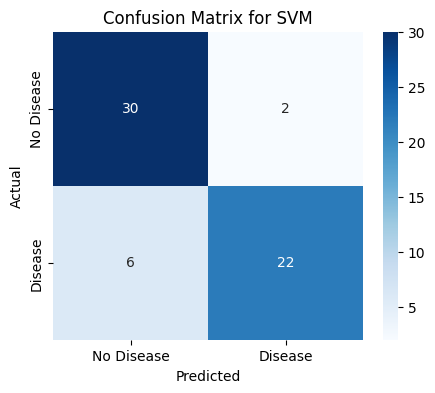

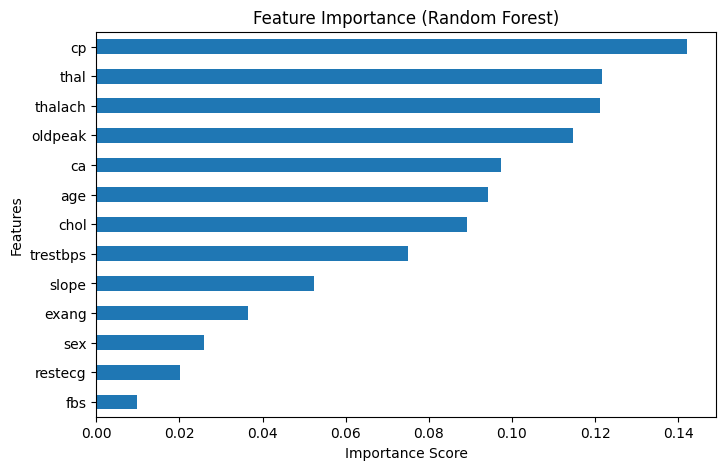

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Evaluate SVM Model with the Best Hyperparameters
y_pred = best_svm.predict(X_test)

# Print classification report (precision, recall, f1-score)
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix for SVM Model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

# Train Random Forest for Feature Importance Analysis
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from Random Forest
importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind="barh", title="Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


### Example: Breast Cancer Classification with SVM
In this project, we use the Breast Cancer dataset from Scikit-Learn, which contains 569 samples (patients) and 30 features extracted from biopsy images. The target variable represents the diagnosis: 0 for Malignant (cancerous) and 1 for Benign (non-cancerous) tumors. We started by loading and exploring the dataset, followed by splitting the data into training and testing sets. To enhance model performance, we standardized the features using StandardScaler.

We then trained three SVM models with different kernels (Linear, Polynomial, and RBF) and compared their accuracy using classification reports and confusion matrices. To further improve performance, we used GridSearchCV to find the optimal hyperparameters (C, gamma) for an optimized SVM model. We also visualized the effect of different hyperparameters using a heatmap, making it easier to interpret the impact of tuning on model performance.

To better understand which features contribute most to predictions, we trained a Random Forest model to analyze feature importance. Finally, we applied PCA (Principal Component Analysis) to reduce the dataset to two dimensions and visualized the decision boundaries of each SVM model to observe how different kernels separate the data.

This workflow demonstrates how to train, tune, evaluate, and interpret SVM models effectively for real-world classification tasks, while also providing insights into hyperparameter selection and feature importance analysis.



First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  

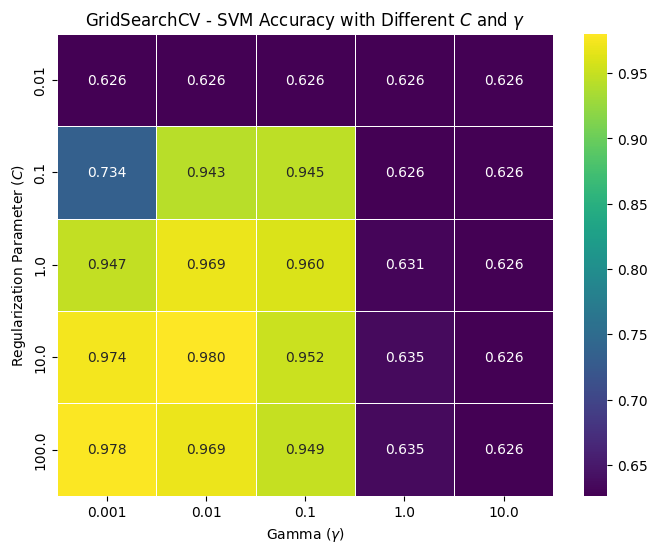


Best Hyperparameters from GridSearchCV: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9802197802197803
Test Accuracy on Unseen Data: 0.9824561403508771


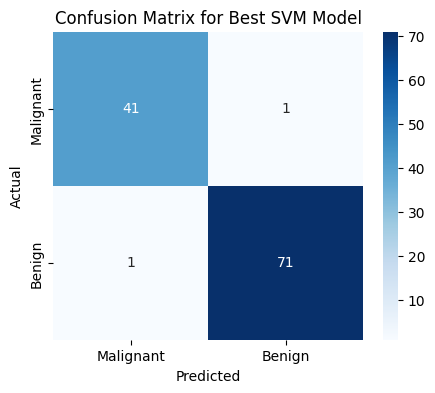

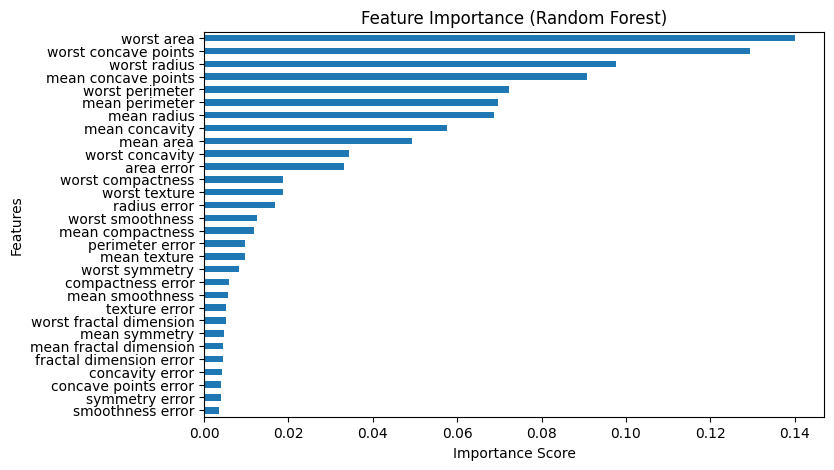

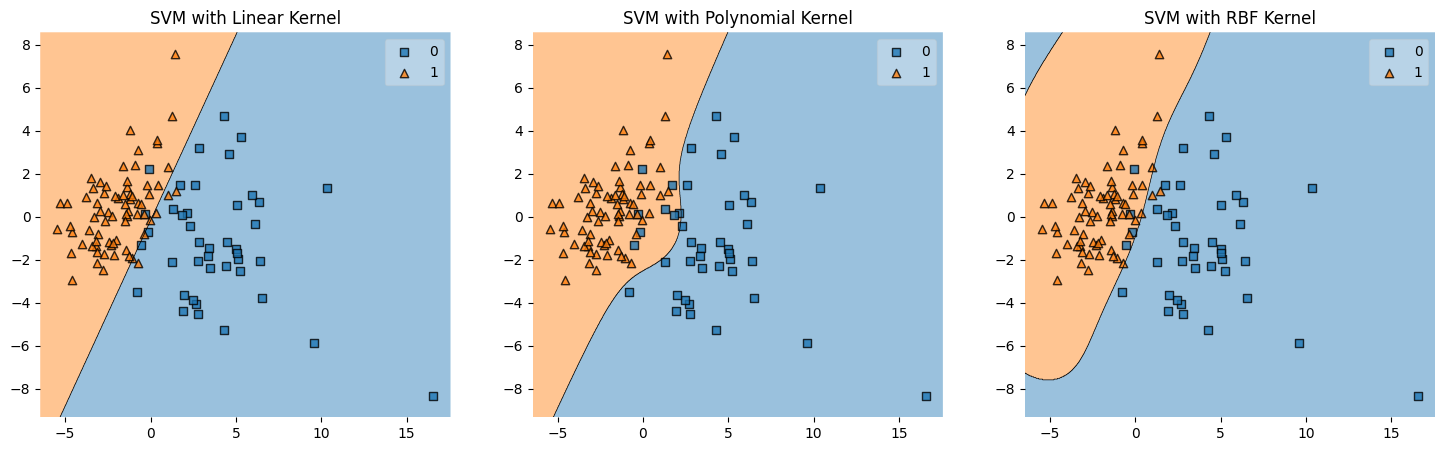

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Load Breast Cancer Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(X.head())

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Features for Better SVM Performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Models with Different Kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict on test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate Accuracy for Different Kernels
print(f"\nLinear Kernel Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Polynomial Kernel Accuracy: {accuracy_score(y_test, y_pred_poly):.4f}")
print(f"RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")

# Print Classification Reports
print("\nClassification Reports:")
print("\nLinear Kernel:\n", classification_report(y_test, y_pred_linear))
print("\nPolynomial Kernel:\n", classification_report(y_test, y_pred_poly))
print("\nRBF Kernel:\n", classification_report(y_test, y_pred_rbf))

# Display Confusion Matrices
print("\nConfusion Matrices:")
print("\nLinear Kernel:\n", confusion_matrix(y_test, y_pred_linear))
print("\nPolynomial Kernel:\n", confusion_matrix(y_test, y_pred_poly))
print("\nRBF Kernel:\n", confusion_matrix(y_test, y_pred_rbf))

# Hyperparameter Tuning Using GridSearchCV + Heatmap
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Plot Heatmap for Hyperparameter Tuning Results
cv_results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = cv_results.pivot(index="param_C", columns="param_gamma", values="mean_test_score")

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", linewidths=0.5, cbar=True)
plt.title("GridSearchCV - SVM Accuracy with Different $C$ and $\gamma$")
plt.xlabel("Gamma ($\gamma$)")
plt.ylabel("Regularization Parameter ($C$)")
plt.show()

# Train the Best SVM Model with Optimized Parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Evaluate Best SVM Model
y_pred_best = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)

print("\nBest Hyperparameters from GridSearchCV:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Accuracy on Unseen Data:", test_accuracy)

# Plot Confusion Matrix for Best Model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best SVM Model")
plt.show()

# Train Random Forest for Feature Importance Analysis
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from Random Forest
importances = pd.Series(rf_model.feature_importances_, index=data.feature_names)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind="barh", title="Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Visualizing Decision Boundaries using PCA
# Reduce dataset to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train new SVM models on PCA-transformed data
svm_linear_pca = SVC(kernel='linear', C=1.0).fit(X_train_pca, y_train)
svm_poly_pca = SVC(kernel='poly', degree=3, C=1.0).fit(X_train_pca, y_train)
svm_rbf_pca = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_train_pca, y_train)

# Plot Decision Boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for model, title, ax in zip([svm_linear_pca, svm_poly_pca, svm_rbf_pca],
                             ["Linear Kernel", "Polynomial Kernel", "RBF Kernel"], axes):
    plot_decision_regions(X_test_pca, y_test, clf=model, ax=ax)
    ax.set_title(f"SVM with {title}")

plt.show()


## **Cross-Validation in Machine Learning**

### **What is Cross-Validation?**
Cross-validation is a statistical technique used in machine learning to **assess model performance** by splitting the dataset into multiple training and testing sets. Instead of relying on a single train-test split, cross-validation systematically tests the model on different subsets of the data, ensuring reliable and robust performance estimation.

### **Why Use Cross-Validation?**
- **Reduces Bias**: Prevents the model from depending on a specific train-test split.
- **Reduces Variance**: Ensures performance consistency across multiple test sets.
- **Prevents Overfitting**: Helps detect whether the model memorizes training data instead of generalizing well.

## **K-Fold Cross-Validation**
One of the most commonly used cross-validation techniques is K-Fold Cross-Validation, where:
1. The dataset is divided into $K$ equal-sized subsets (folds).
2. The model is trained on $K-1$ folds and tested on the remaining fold.
3. This process repeats $K$ times, with each fold serving as the test set once.
4. The final model performance is the average accuracy across all $K$ folds.

### **Mathematical Formula for K-Fold Cross-Validation**
The cross-validation accuracy score is given by:

$$
CV_{score} = \frac{1}{K} \sum_{i=1}^{K} Accuracy_i
$$

where:
- **$K$** is the number of folds.
- **$Accuracy_i$** is the model’s accuracy on the $i$-th fold.

### **Example: 5-Fold Cross-Validation**
For **$K = 5$**:
1. Train on Folds 2, 3, 4, 5 → Test on Fold 1
2. Train on Folds 1, 3, 4, 5 → Test on Fold 2
3. Train on Folds 1, 2, 4, 5 → Test on Fold 3
4. Train on Folds 1, 2, 3, 5 → Test on Fold 4
5. Train on Folds 1, 2, 3, 4 → Test on Fold 5

The final score is the average of all test accuracies.



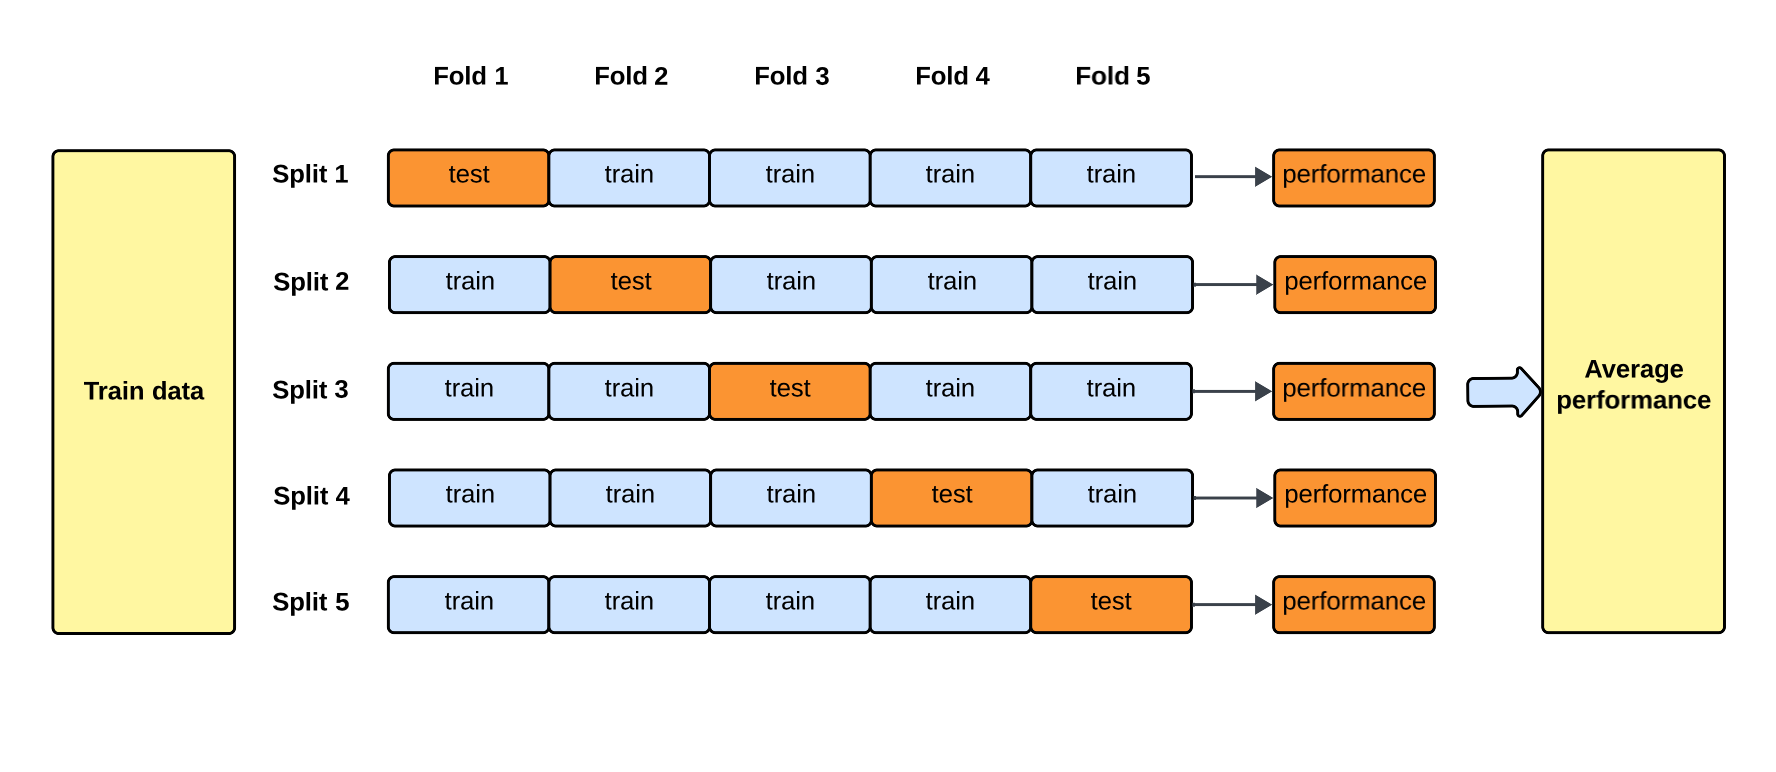

Ref: https://towardsdatascience.com/how-to-cross-validation-with-time-series-data-9802a06272c6/

## **Stratified K-Fold Cross-Validation**
For classification tasks, we often use Stratified K-Fold, which ensures that each fold maintains the same proportion of class labels as the original dataset.

$$
CV_{score} = \frac{1}{K} \sum_{i=1}^{K} Accuracy_i
$$

This is particularly useful for handling imbalanced datasets, preventing one class from dominating certain folds.

## **Leave-One-Out Cross-Validation (LOOCV)**
LOOCV is an extreme case of cross-validation where:
- Each fold consists of only one data point used for testing.
- The model is trained on all other data points.
- This process is repeated for each data point.

This method is computationally expensive but provides an unbiased estimate of model performance.

## Key Takeaways
- **K-Fold Cross-Validation** ensures robust model evaluation.  
- **Stratified K-Fold** is better for classification tasks with imbalanced data.  
- **LOOCV** is useful but computationally expensive.  


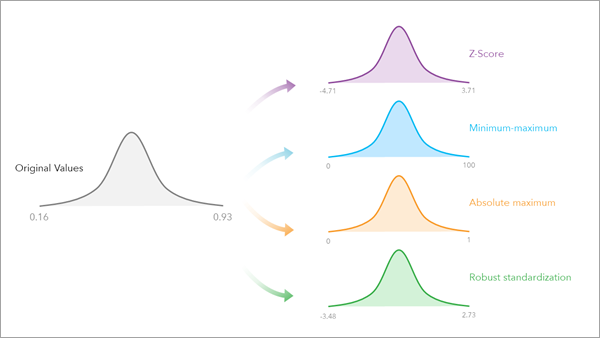

Ref: https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/standardizefield.htm

# Why Do We Standardize Features in Machine Learning?

## What is Feature Scaling?
Feature scaling is a technique used to normalize the range of independent variables (features) so that they contribute equally to model learning. Without scaling, some features with large values may dominate others, leading to biased learning.

## Why Does SVM Require Feature Scaling?
Support Vector Machines (SVM) use distances to separate classes. If features have very different scales, the model might be skewed towards high-value features, making the decision boundary less effective.

## StandardScaler (Z-score Normalization)
One of the most common methods for scaling is Standardization, which transforms the data to have:
- Mean (μ) = 0
- Standard deviation (σ) = 1

The formula used by `StandardScaler()`:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

where:
- $\mu$ = Mean of the feature values.
- $\sigma$ = Standard deviation of the feature values.

**When to Use?**  
- Works best for models like SVM, k-NN, Logistic Regression, PCA, and Gradient Descent-based models.
- Useful when data follows a normal (Gaussian) distribution.

## MinMaxScaler (Normalization)
Another method is Min-Max Scaling, which transforms the values into a fixed range $[0,1]$:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

**When to Use?**  
- When all features need to be within a fixed range (e.g., images, deep learning).
- Works well if the data is not normally distributed.

## RobustScaler (For Outliers)
RobustScaler is an alternative when data contains outliers. Instead of mean and standard deviation, it uses the median and interquartile range (IQR) to scale features.

The formula:

$$
X_{\text{scaled}} = \frac{X - \text{median}(X)}{IQR}
$$

**When to Use?**  
- If the dataset contains outliers, this method prevents extreme values from affecting the model.


## When Should You Use Each Method?
| Method | Best For | Formula |
|--------|----------|---------|
| **StandardScaler** | SVM, Logistic Regression, PCA | $$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$ |
| **MinMaxScaler** | Neural Networks, k-Means Clustering | $$ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$ |
| **RobustScaler** | Datasets with Outliers | $$ X_{\text{scaled}} = \frac{X - \text{median}(X)}{IQR} $$ |


## How to Use Feature Scaling in Python

### Using StandardScaler (Recommended for SVM)
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

### Using MinMaxScaler
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

### Using RobustScaler
```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```


## Key Takeaways
- SVM requires feature scaling to work effectively.  
- StandardScaler is the best choice for SVM because it standardizes data to a mean of 0 and a standard deviation of 1.  
- MinMaxScaler is useful for deep learning and cases where data should be between 0 and 1.  
- RobustScaler is best for datasets with outliers to avoid extreme values influencing the model.  

